In [1]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from matplotlib.animation import FFMpegWriter
from scipy.spatial.distance import cdist

In [46]:
# File paths
file_path = '/Users/apaula/Nextcloud/locustVR/locustVR_data/20231113_150126/20231113_150126_Optomotor_VR3_.csv'

# Load the locust data

df = pd.read_csv(file_path)


# Show first few rows of each dataframe
df.head()

,Current Time,VR,Scene,CurrentStep,SensPosX,SensPosY,SensPosZ,SensRotX,SensRotY,SensRotZ,GameObjectPosX,GameObjectPosY,GameObjectPosZ,GameObjectRotX,GameObjectRotY,GameObjectRotZ
0,2023-11-13 15:01:33.253,VR3,Optomotor,0,0,0,0,0,0.0000,0,0.0000,0.0000,0,0,0.0000,0
1,2023-11-13 15:01:33.298,VR3,Optomotor,0,0,0,0,0,0.0000,0,-403.7625,-105.5015,0,0,155.9658,0
2,2023-11-13 15:01:33.315,VR3,Optomotor,0,0,0,0,0,155.9658,0,-403.7299,-105.4509,0,0,151.6331,0
3,2023-11-13 15:01:33.331,VR3,Optomotor,0,0,0,0,0,151.6331,0,-403.7299,-105.4509,0,0,151.6331,0
4,2023-11-13 15:01:33.348,VR3,Optomotor,0,0,0,0,0,151.6331,0,-403.7219,-105.4417,0,0,148.8313,0


In [21]:
df_head = df.head(10000)
print(df_head)


                 Current Time   VR      Scene  CurrentStep  SensPosX  \
0     2023-11-13 15:01:33.253  VR1  Optomotor            0         0   
1     2023-11-13 15:01:33.298  VR1  Optomotor            0         0   
2     2023-11-13 15:01:33.315  VR1  Optomotor            0         0   
3     2023-11-13 15:01:33.331  VR1  Optomotor            0         0   
4     2023-11-13 15:01:33.348  VR1  Optomotor            0         0   
...                       ...  ...        ...          ...       ...   
7184  2023-11-13 15:03:33.201  VR1  Optomotor            0         0   
7185  2023-11-13 15:03:33.217  VR1  Optomotor            0         0   
7186  2023-11-13 15:03:33.234  VR1  Optomotor            0         0   
7187  2023-11-13 15:03:33.251  VR1  Optomotor            0         0   
7188  2023-11-13 15:03:33.267  VR1  Optomotor            0         0   

      SensPosY  SensPosZ  SensRotX   SensRotY  SensRotZ  GameObjectPosX  \
0            0         0         0    0.00000         0     

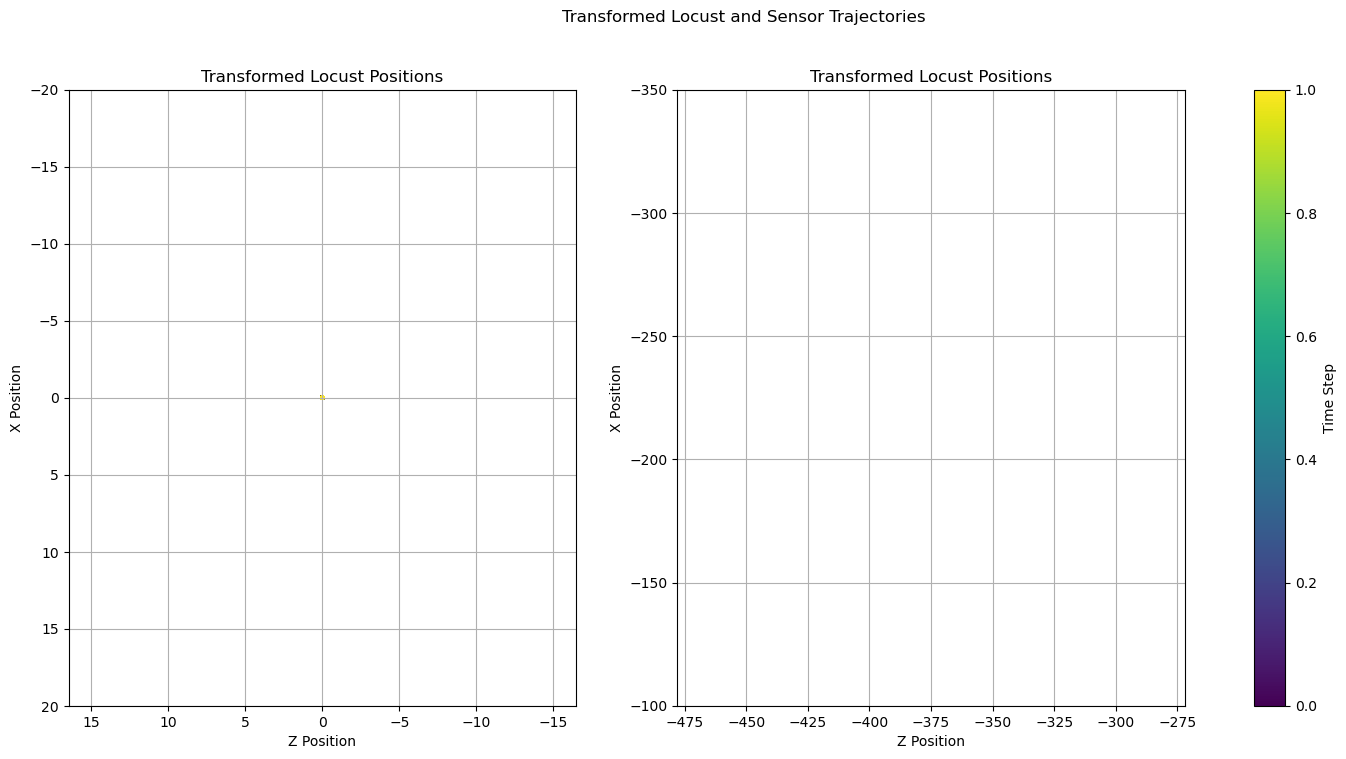

In [22]:
# Creating subplots for locust and sensor trajectories with corrected axes
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Subplot for Transformed Locust Positions (InsectPosZ and InsectPosX)
axes[0].scatter(df['SensPosZ'], df['SensPosX'], c=range(len(df)), cmap='viridis', s=5)
axes[0].set_title('Transformed Locust Positions')
axes[0].set_xlabel('Z Position')
axes[0].set_ylabel('X Position')
axes[0].axis('equal')
axes[0].set_xlim(20, -20)
axes[0].set_ylim(20, -20)
axes[0].grid(True)

# Subplot for Transformed Locust Positions (InsectPosZ and InsectPosX)
axes[1].scatter(df['GameObjectPosX'], df['GameObjectPosY'], c=range(len(df)), cmap='viridis', s=5)
axes[1].set_title('Transformed Locust Positions')
axes[1].set_xlabel('Z Position')
axes[1].set_ylabel('X Position')
axes[1].axis('equal')
axes[1].set_xlim(-500, -250)
axes[1].set_ylim(-100, -350)
axes[1].grid(True)

# Adding colorbar and overall title
fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=axes.ravel().tolist(), label='Time Step')
fig.suptitle('Transformed Locust and Sensor Trajectories')

plt.show()


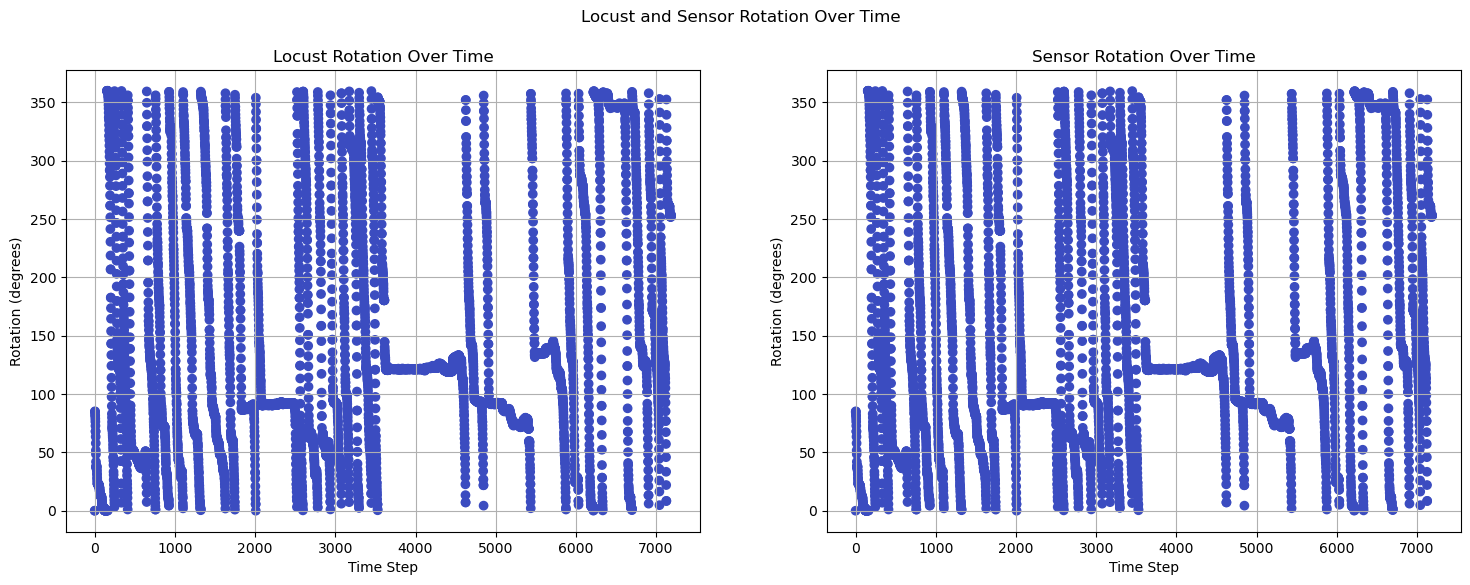

In [23]:
df_head = df.head(15000)

time_index = range(len(df_head))

# Creating subplots for locust and sensor rotation over time
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subplot for Locust Rotation (InsectRotY)
axes[0].scatter(time_index, df_head['SensRotY'], c=df_head['CurrentStep'], cmap='coolwarm', label='Insect Rotation (Y-axis)')
axes[0].set_title('Locust Rotation Over Time')
axes[0].set_xlabel('Time Step')
axes[0].set_ylabel('Rotation (degrees)')
axes[0].grid(True)

# Subplot for Sensor Rotation (SensRotY)
axes[1].scatter(time_index, df_head['GameObjectRotY'], c=df_head['CurrentStep'], cmap='coolwarm', label='Sensor Rotation (Y-axis)')
axes[1].set_title('Sensor Rotation Over Time')
axes[1].set_xlabel('Time Step')
axes[1].set_ylabel('Rotation (degrees)')
axes[1].grid(True)

# Adding overall title
fig.suptitle('Locust and Sensor Rotation Over Time')

plt.show()

In [24]:
# File paths
file_path = '/Users/apaula/Nextcloud/locustVR/locustVR_data/20231113_150126/20231113_150126_Optomotor_GratingGenerator_.csv'

# Load the locust data

df_grating = pd.read_csv(file_path)

In [27]:
df_grating.head()

,Current Time,VR,Scene,CurrentStep,GameObjectPosX,GameObjectPosY,GameObjectPosZ,GameObjectRotX,GameObjectRotY,GameObjectRotZ
0,2023-11-13 15:01:33.253,Grating Generator,Optomotor,0,0,0,0,0,0.0,0
1,2023-11-13 15:01:33.298,Grating Generator,Optomotor,0,0,0,0,0,0.0,0
2,2023-11-13 15:01:33.315,Grating Generator,Optomotor,0,0,0,0,0,0.0,0
3,2023-11-13 15:01:33.331,Grating Generator,Optomotor,0,0,0,0,0,0.0,0
4,2023-11-13 15:01:33.348,Grating Generator,Optomotor,0,0,0,0,0,0.0,0


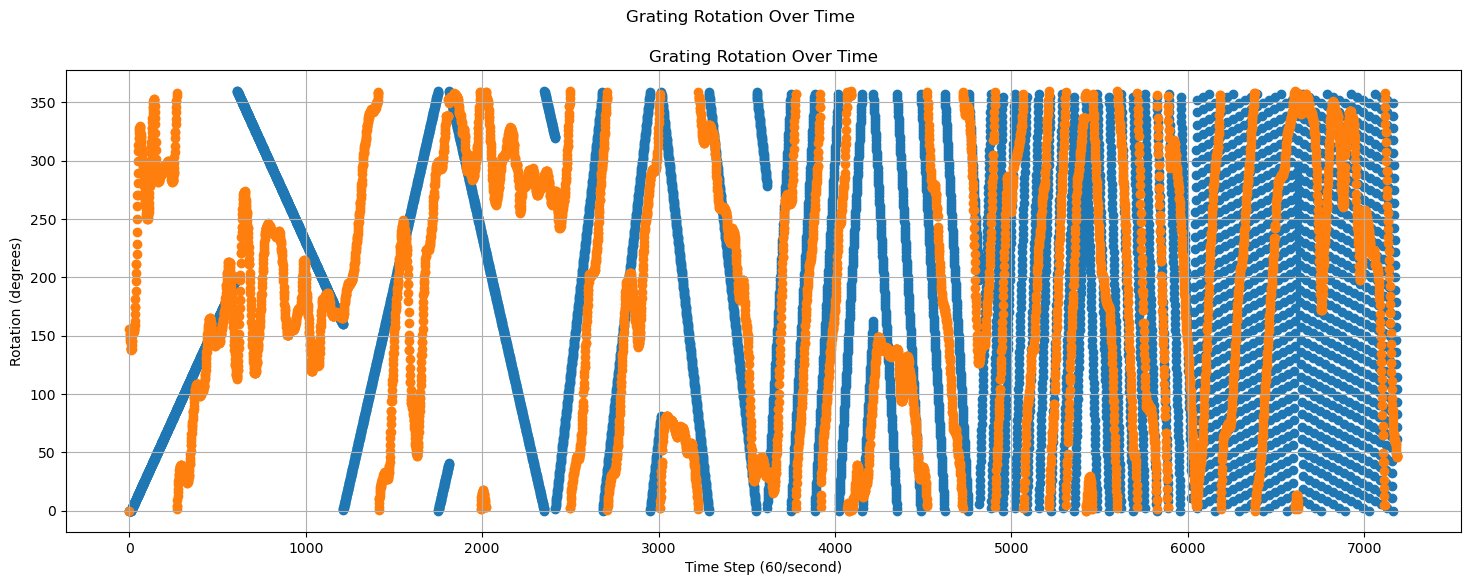

In [59]:

time_index = range(len(df_grating))

# Creating subplots for grating rotation over time
fig, axes = plt.subplots(1, 1, figsize=(18, 6))

# Subplot for Grating Rotation (GratingRotY)
axes.scatter(time_index, df_grating['GameObjectRotY'], label='Grating Rotation (Y-axis)')
axes.scatter(time_index, df['GameObjectRotY'], label='Sensor Rotation (Y-axis)')
axes.set_title('Grating Rotation Over Time')
axes.set_xlabel('Time Step (60/second)')
axes.set_ylabel('Rotation (degrees)')
axes.grid(True)

# Adding overall title
fig.suptitle('Grating Rotation Over Time')

plt.show()


In [58]:
df_grating['Current Time'][0]

'2023-11-13 15:01:33.253'

In [57]:
df['Current Time'][7000]

'2023-11-13 15:03:30.134'

In [43]:
!pip install plotly


In [60]:
import plotly.graph_objects as go
import numpy as np

# Convert your range object to a numpy array
time_index = np.array(range(len(df_grating)))

# Create a Plotly figure
fig = go.Figure()

# Add traces for Grating and Sensor Rotation on the Y-axis
fig.add_trace(go.Scatter(x=time_index, y=df_grating['GameObjectRotY'], mode='markers', name='Grating Rotation'))
fig.add_trace(go.Scatter(x=time_index, y=df['GameObjectRotY'], mode='markers', name='Animal Rotation'))

# Update layout for a cleaner look
fig.update_layout(
    title='Optomotor Response',
    xaxis_title='Time Step (60/second)',
    yaxis_title='Rotation (degrees)',
    legend_title='Legend',
    template='plotly_dark' # You can change the template as per your preference
)

# Show the interactive plot
fig.show()


In [50]:
fig.write_html('/Users/apaula/Downloads/optomotor.html')

TypeError: unsupported operand type(s) for -: 'str' and 'str'